# Business Context:
This case requires trainees to develop a model for predicting fraudulent transactions for a financial company and use insights from the model to develop an actionable plan. Data for the case is available in CSV format having 6362620 rows and 10 columns. Candidates can use whatever method they wish to develop their machine learning model. Following usual model development procedures, the model would be estimated on the calibration data and tested on the validation data. This case requires both statistical analysis and creativity/judgment. We recommend you spend time on both fine-tuning and interpreting the results of your machine learning model.

Data Dictionary:

step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount - amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Dataset loading

In [2]:
df= pd.read_csv(r"C:\Users\vsmal\fraud detection\fraud.csv")

In [3]:
df


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


# Data cleaning

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

* There in no null values in dataset

In [6]:
types = {'PAYMENT': 1,'TRANSFER': 2,'CASH_IN':3,'CASH_OUT':4,'DEBIT':5}
  
# traversing through dataframe
# Gender column and writing
# values where key matches
df.type = [types[item] for item in df.type]
print(df)


         step  type      amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0           1     1     9839.64  C1231006815      170136.00       160296.36   
1           1     1     1864.28  C1666544295       21249.00        19384.72   
2           1     2      181.00  C1305486145         181.00            0.00   
3           1     4      181.00   C840083671         181.00            0.00   
4           1     1    11668.14  C2048537720       41554.00        29885.86   
...       ...   ...         ...          ...            ...             ...   
6362615   743     4   339682.13   C786484425      339682.13            0.00   
6362616   743     2  6311409.28  C1529008245     6311409.28            0.00   
6362617   743     4  6311409.28  C1162922333     6311409.28            0.00   
6362618   743     2   850002.52  C1685995037      850002.52            0.00   
6362619   743     4   850002.52  C1280323807      850002.52            0.00   

            nameDest  oldbalanceDest  newbalanceDes

* convert transiction types into integer

# Correlation

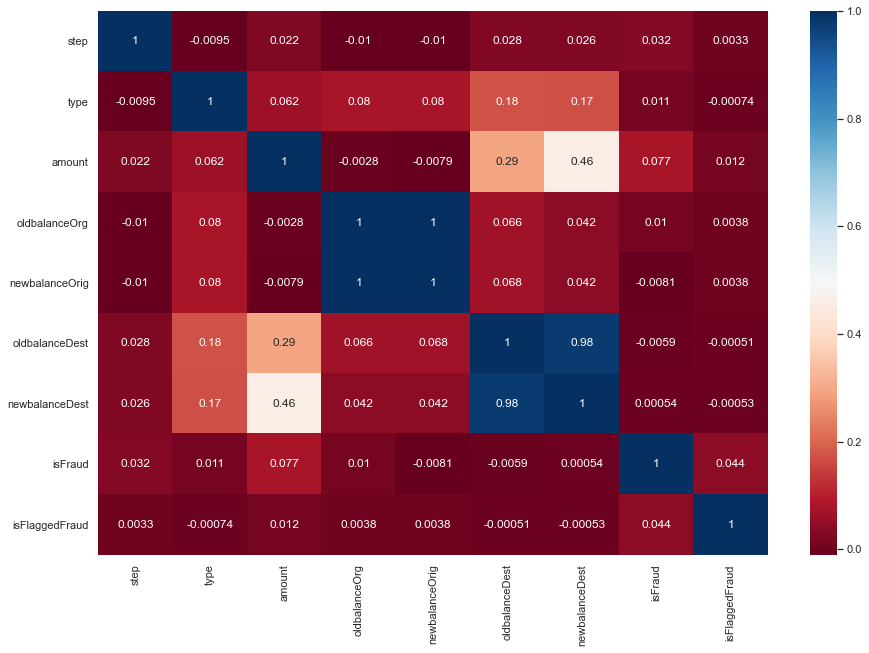

In [7]:
sns.set(rc = {'figure.figsize':(15,10)})
sns.heatmap(df.corr(), cmap="RdBu",annot=True)
plt.show()

# Observations:
    
    * target variable is possitively correlated with amount, and isflaggedfroud.

# fraud and valid transictions over time

Fraud: (8213, 11)
Valid: (6354407, 11)


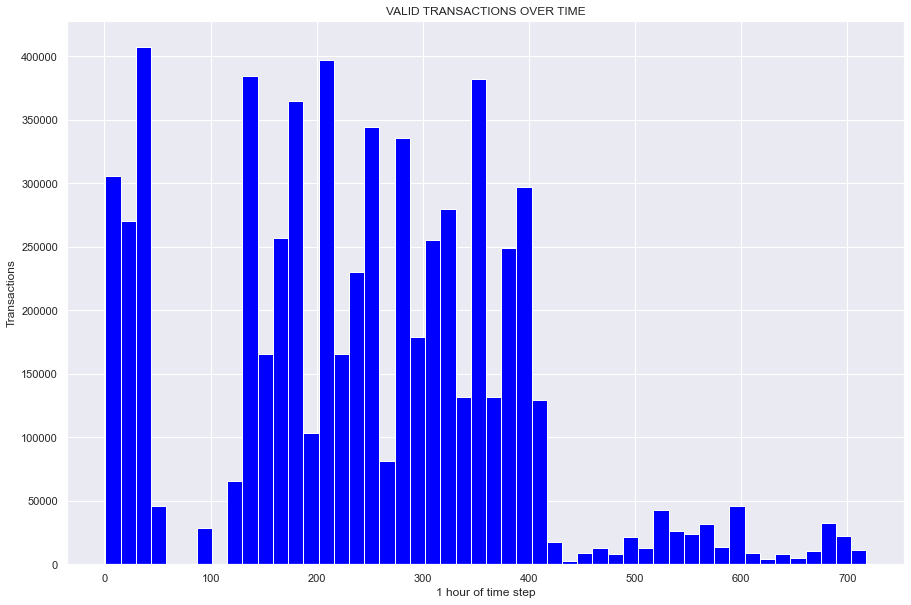

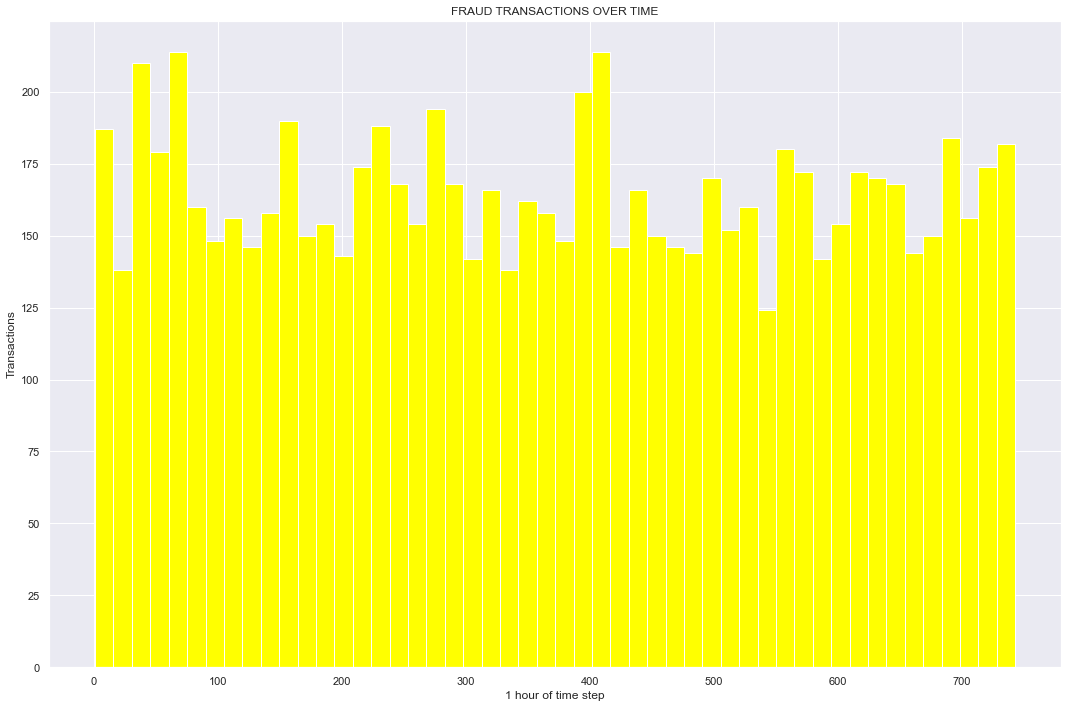

In [8]:
#Time Patterns
fraud = df[df['isFraud']==1]
valid = df[df['isFraud']==0]
print("Fraud:",fraud.shape)
print("Valid:",valid.shape)



sns.set_theme(style="darkgrid")
bins = 50
valid.hist(column="step", color="blue", bins=bins)
plt.xlabel("1 hour of time step")
plt.ylabel("Transactions")
plt.title("VALID TRANSACTIONS OVER TIME")

fraud.hist(column="step", color="yellow", bins=bins)
plt.xlabel("1 hour of time step")
plt.ylabel("Transactions")
plt.title("FRAUD TRANSACTIONS OVER TIME")

plt.tight_layout()
plt.show()

# Count distribution

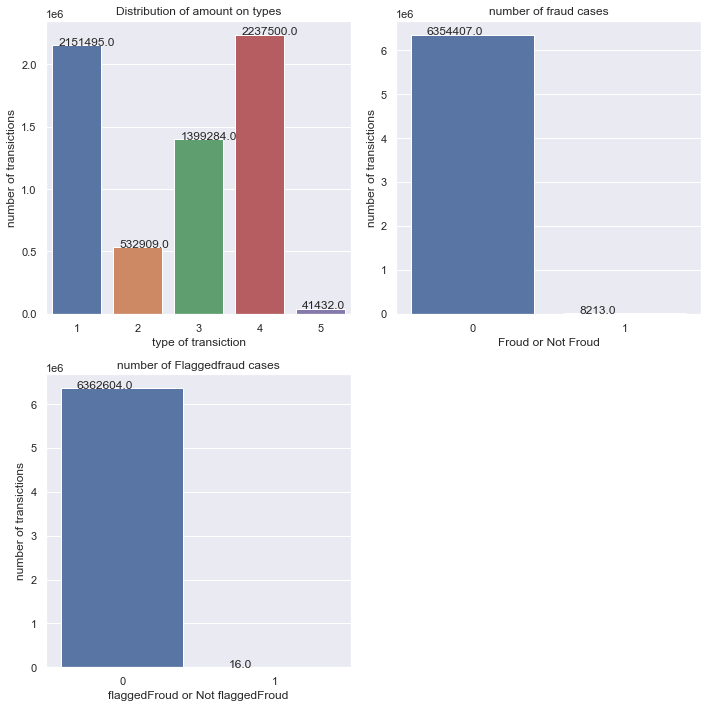

In [9]:
plt.figure(figsize=(10,10))

plt.figure(1)

# Distribution of Loans by Status
plt.subplot(2,2,1)
ax=sns.countplot(x='type', data=df)
plt.title('Distribution of amount on types')
plt.xlabel("type of transiction")
plt.ylabel("number of transictions")
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

plt.subplot(2,2,2)
ax=sns.countplot(x='isFraud', data=df)
plt.title('number of fraud cases')
plt.xlabel("Froud or Not Froud")
plt.ylabel("number of transictions")
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
        
plt.subplot(2,2,3)
ax=sns.countplot(x='isFlaggedFraud', data=df)
plt.title('number of Flaggedfraud cases')
plt.xlabel("flaggedFroud or Not flaggedFroud")
plt.ylabel("number of transictions")
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))





plt.tight_layout()
plt.show()

# Observations :

* Most of transiction types were payment, cash in and cash out.

* There is only 8213 fraud transictions from 6362620 transiction.

* so dataset is very imbalanced. 

* It has not fraud (mejority) and fraud(minority) transictions.

* We need to compress dataset for balance fraud and not fraud transictions.

In [10]:
df['origin_bal_change'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['dest_bal_change'] = df['newbalanceDest'] - df['oldbalanceDest']


* there is error in origin balance and destination balance.

* so calculate differance in origin balance and destination balance.

* This named as origin_bal_change and dest_bal_change.

In [11]:
fraud = df[df['isFraud']==1]
fraud

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,origin_bal_change,dest_bal_change
2,1,2,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0,181.00,0.00
3,1,4,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0,181.00,-21182.00
251,1,2,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0,2806.00,0.00
252,1,4,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0,2806.00,-26202.00
680,1,2,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0,20128.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,4,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0,339682.13,339682.13
6362616,743,2,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0,6311409.28,0.00
6362617,743,4,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0,6311409.28,6311409.27
6362618,743,2,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0,850002.52,0.00


In [12]:
transfer = df[(df['type']==2) & (df['isFraud']==0)]
transfer1=transfer.sample(n=13500)
transfer1

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,origin_bal_change,dest_bal_change
5816760,401,2,11348.24,C1376321617,0.0,0.0,C2074630256,317262.67,328610.91,0,0,0.0,11348.24
127651,11,2,971009.02,C1932734531,0.0,0.0,C1505428898,2169574.43,0.00,0,0,0.0,-2169574.43
608783,34,2,51050.68,C1620598913,0.0,0.0,C1869834132,548789.69,486490.15,0,0,0.0,-62299.54
3196103,249,2,162986.03,C1122990761,0.0,0.0,C2106954661,1833399.67,1996385.70,0,0,0.0,162986.03
5796506,401,2,155627.58,C1159197995,0.0,0.0,C1662067286,1335196.33,1490823.90,0,0,0.0,155627.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2043677,181,2,265279.72,C59556383,0.0,0.0,C987134794,7545851.42,7811131.14,0,0,0.0,265279.72
4391806,321,2,3558309.76,C1377191870,0.0,0.0,C1546112622,9285216.47,12843526.23,0,0,0.0,3558309.76
93795,10,2,524201.64,C534690797,0.0,0.0,C705487682,1770938.59,3631062.50,0,0,0.0,1860123.91
2115088,183,2,266668.02,C503928951,20030.0,0.0,C2018462611,78152.30,344820.31,0,0,20030.0,266668.01


In [13]:
payment = df[(df['type']==1) & (df['isFraud']==0)]
payment1=payment.sample(n=13500)
payment1

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,origin_bal_change,dest_bal_change
112315,11,1,17086.12,C1293179293,832394.22,815308.10,M1703551035,0.0,0.0,0,0,17086.12,0.0
2335820,188,1,5479.02,C727591469,6853.11,1374.09,M1188739692,0.0,0.0,0,0,5479.02,0.0
1339989,137,1,491.95,C1579902460,96165.00,95673.05,M2032926420,0.0,0.0,0,0,491.95,0.0
5555451,383,1,593.81,C2031400117,15008.00,14414.19,M1156660611,0.0,0.0,0,0,593.81,0.0
5095747,355,1,16786.27,C960901361,70922.78,54136.51,M813912173,0.0,0.0,0,0,16786.27,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2446458,203,1,2798.50,C170530585,0.00,0.00,M178226589,0.0,0.0,0,0,0.00,0.0
4360278,309,1,12779.73,C1727317283,0.00,0.00,M1755848545,0.0,0.0,0,0,0.00,0.0
5025368,353,1,29213.47,C609958465,11222.00,0.00,M498800727,0.0,0.0,0,0,11222.00,0.0
2638488,209,1,904.86,C1476304226,0.00,0.00,M152259220,0.0,0.0,0,0,0.00,0.0


In [14]:
cash_out = df[(df['type']==4) & (df['isFraud']==0)]
cash_out1 = cash_out.sample(n=13500)
cash_out1

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,origin_bal_change,dest_bal_change
2850466,227,4,75877.99,C74276197,144610.68,68732.68,C341157858,2070509.80,2146387.80,0,0,75878.00,75878.00
2591411,207,4,109106.85,C57612998,105131.00,0.00,C68572544,284289.66,393396.51,0,0,105131.00,109106.85
2115865,183,4,420264.44,C1566316333,0.00,0.00,C1531626364,1115088.79,1535353.22,0,0,0.00,420264.43
6074652,517,4,65236.65,C260452126,20867.00,0.00,C128995212,1796191.76,1861428.41,0,0,20867.00,65236.65
2487607,204,4,198933.97,C293481914,0.00,0.00,C1998089132,660631.27,859565.24,0,0,0.00,198933.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049996,95,4,212254.00,C600942517,0.00,0.00,C1605453522,2981493.54,3193747.53,0,0,0.00,212253.99
6246742,596,4,205236.72,C1542128339,0.00,0.00,C995143050,1798169.76,2003406.49,0,0,0.00,205236.73
4079089,301,4,148765.60,C1326215228,315.00,0.00,C894697981,753170.39,901935.99,0,0,315.00,148765.60
5445458,379,4,34739.24,C899552191,0.00,0.00,C131651280,2303647.61,2338386.85,0,0,0.00,34739.24


In [15]:
cash_in = df[(df['type']==3) & (df['isFraud']==0)]
cash_in1 = cash_in.sample(n=13500)
cash_in1

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,origin_bal_change,dest_bal_change
4989650,352,3,25600.70,C1801695840,1215089.46,1240690.17,C21005811,1405001.37,1379400.67,0,0,-25600.71,-25600.70
331257,16,3,238936.21,C488131280,5634044.93,5872981.14,C1048998032,1467846.54,1228910.34,0,0,-238936.21,-238936.20
6137236,544,3,106328.81,C613193246,5920479.85,6026808.65,C400307515,4158429.44,4052100.63,0,0,-106328.80,-106328.81
3627855,274,3,155765.70,C1436223920,161597.00,317362.70,C1509406594,0.00,0.00,0,0,-155765.70,0.00
4914166,349,3,107661.06,C371074442,59689.00,167350.06,C865588332,543291.13,435630.07,0,0,-107661.06,-107661.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5871527,403,3,4855.70,C1006476284,7332654.53,7337510.23,C1677331752,1587134.81,1582279.11,0,0,-4855.70,-4855.70
2571076,207,3,75264.35,C1313588492,7953657.56,8028921.91,C160939398,1040218.24,964953.89,0,0,-75264.35,-75264.35
5717608,398,3,190242.56,C1504465969,2246263.78,2436506.34,C966646885,966199.96,775957.39,0,0,-190242.56,-190242.57
2132059,183,3,32337.69,C887138826,2016.00,34353.69,C374256236,7248.46,0.00,0,0,-32337.69,-7248.46


In [16]:
debit = df[(df['type']==5) & (df['isFraud']==0)]
debit1 = debit.sample(n=13500)
debit1

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,origin_bal_change,dest_bal_change
2255805,187,5,2737.64,C2147447903,304897.14,302159.50,C2086284074,1221570.40,1224308.04,0,0,2737.64,2737.64
1003688,46,5,3239.88,C1115346919,461.00,0.00,C1019145034,2646387.33,2649627.21,0,0,461.00,3239.88
1328046,137,5,1848.18,C1761277152,1034.00,0.00,C22630227,337906.36,339754.53,0,0,1034.00,1848.17
1065584,120,5,6009.01,C1239571065,509.00,0.00,C1455303794,90465.45,96474.46,0,0,509.00,6009.01
4864090,348,5,13530.85,C1905756366,20389.00,6858.15,C1307752419,178745.87,192276.73,0,0,13530.85,13530.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2059543,181,5,1563.45,C1817646879,44811.00,43247.55,C1317324562,674145.43,675708.88,0,0,1563.45,1563.45
3314170,252,5,23575.65,C1595446354,0.00,0.00,C1163288343,1096048.12,1119623.78,0,0,0.00,23575.66
3004573,232,5,5999.71,C151335208,51309.00,45309.29,C151496820,102685.00,108684.71,0,0,5999.71,5999.71
2368444,191,5,2833.91,C195547557,380.00,0.00,C2099661942,775932.77,778766.68,0,0,380.00,2833.91


# Compressed dataset  from 6362620 to 75713 rows

In [17]:
df1 = pd.concat([transfer1,payment1,cash_out1,debit1,cash_in1,fraud], axis=0)
df1

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,origin_bal_change,dest_bal_change
5816760,401,2,11348.24,C1376321617,0.00,0.0,C2074630256,317262.67,328610.91,0,0,0.00,11348.24
127651,11,2,971009.02,C1932734531,0.00,0.0,C1505428898,2169574.43,0.00,0,0,0.00,-2169574.43
608783,34,2,51050.68,C1620598913,0.00,0.0,C1869834132,548789.69,486490.15,0,0,0.00,-62299.54
3196103,249,2,162986.03,C1122990761,0.00,0.0,C2106954661,1833399.67,1996385.70,0,0,0.00,162986.03
5796506,401,2,155627.58,C1159197995,0.00,0.0,C1662067286,1335196.33,1490823.90,0,0,0.00,155627.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,4,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0,339682.13,339682.13
6362616,743,2,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0,6311409.28,0.00
6362617,743,4,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0,6311409.28,6311409.27
6362618,743,2,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0,850002.52,0.00


<AxesSubplot:title={'center':'COUNT OF FRAUDULENT VS NON-FRAUDULENT TRANSACTIONS'}, xlabel='isFraud'>

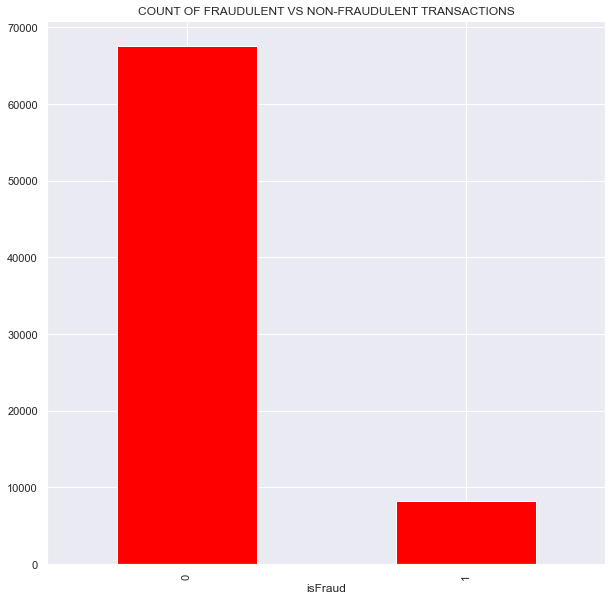

In [24]:
pd.Series(Y).value_counts().plot(kind='bar',color='red',figsize=(10,10),title='COUNT OF FRAUDULENT VS NON-FRAUDULENT TRANSACTIONS', xlabel='isFraud')

# Feature selection

In [20]:
#Importing Packages
from random import seed, sample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [21]:
X = df1.drop(["isFraud","step",'nameDest','nameOrig'], axis=1)
Y = df1.isFraud

In [22]:
X

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,origin_bal_change,dest_bal_change
5816760,2,11348.24,0.00,0.0,317262.67,328610.91,0,0.00,11348.24
127651,2,971009.02,0.00,0.0,2169574.43,0.00,0,0.00,-2169574.43
608783,2,51050.68,0.00,0.0,548789.69,486490.15,0,0.00,-62299.54
3196103,2,162986.03,0.00,0.0,1833399.67,1996385.70,0,0.00,162986.03
5796506,2,155627.58,0.00,0.0,1335196.33,1490823.90,0,0.00,155627.57
...,...,...,...,...,...,...,...,...,...
6362615,4,339682.13,339682.13,0.0,0.00,339682.13,0,339682.13,339682.13
6362616,2,6311409.28,6311409.28,0.0,0.00,0.00,0,6311409.28,0.00
6362617,4,6311409.28,6311409.28,0.0,68488.84,6379898.11,0,6311409.28,6311409.27
6362618,2,850002.52,850002.52,0.0,0.00,0.00,0,850002.52,0.00


In [23]:
Y

5816760    0
127651     0
608783     0
3196103    0
5796506    0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 75713, dtype: int64

In [28]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)


In [29]:
scaler = StandardScaler()

#Fit only to the training data
scaler.fit(x_train)

#Now apply the transformations to the data:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# 1. Logistic regression including AUC and ROC curve

In [30]:
from sklearn.linear_model  import  LogisticRegression
from sklearn.model_selection import train_test_split


from sklearn.metrics import accuracy_score, confusion_matrix


log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

In [31]:
y_pred_train = log_reg.predict(x_train)
print(f"Predicted y for training is {y_pred_train}")

y_pred_test = log_reg.predict(x_test)
print(f"Predicted y for testing is {y_pred_test}")

accuracy_train = accuracy_score(y_train,y_pred_train)*100
print(f"training accuracy is {accuracy_train}")
accuracy_test = accuracy_score(y_test,y_pred_test)*100
print(f"testing accuraccu accuracy is {accuracy_test}")

Predicted y for training is [0 1 0 ... 0 0 0]
Predicted y for testing is [0 0 0 ... 0 1 0]
training accuracy is 96.19778768367179
testing accuraccu accuracy is 96.53305157498514


In [32]:

from sklearn.metrics import accuracy_score, confusion_matrix


conf_mat = confusion_matrix(y_test,y_pred_test)
conf_mat

array([[13493,    74],
       [  451,  1125]], dtype=int64)

In [33]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [34]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
print(f"Accuracy is {Accuracy*100}%")

Precision = true_positive/(true_positive+false_positive)
print(f"Pricision is: {Precision}")


Recall = true_positive/(true_positive+false_negative)
print(f"Recall is {Recall}")

f1=2*((Precision * Recall )) /(Precision + Recall)
print(f"F1 score is {f1}")


Accuracy is 96.53305157498514%
Pricision is: 0.9945455885604776
Recall is 0.9676563396442914
F1 score is 0.9809167242194031


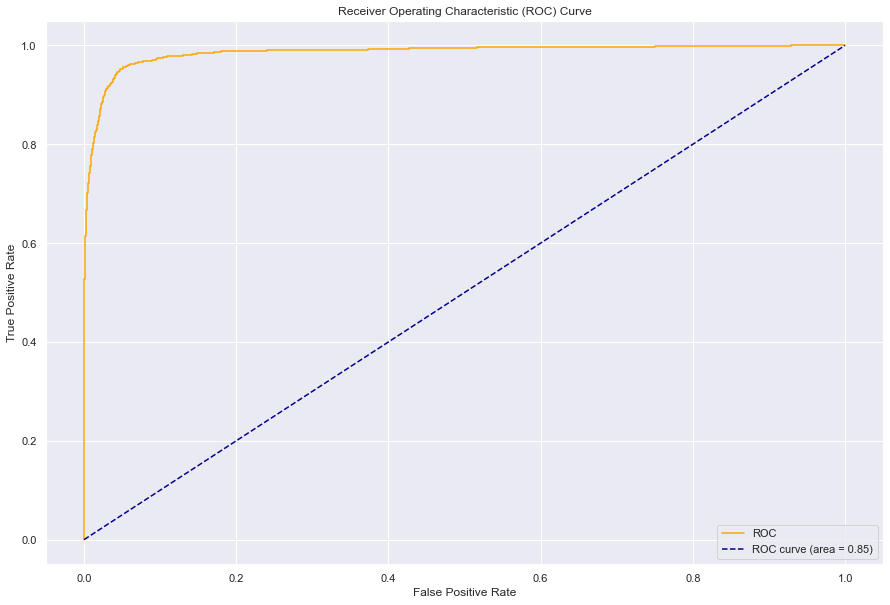

In [35]:
from sklearn.metrics import  roc_curve, roc_auc_score

auc = roc_auc_score(y_test, y_pred_test)
auc

y_pred_prob = log_reg.predict_proba(x_test)
y_pred_prob

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

1) Accuracy found 96.55 %.

2) model describes 86% area under curve.

3) So we can say that model is well trained.

# 2. Random forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
parameters = {'n_estimators':15,'class_weight': "balanced",'n_jobs':-1,'random_state':42}
RFC = RandomForestClassifier(**parameters)
model_rf= RFC.fit(x_train, y_train)
 


In [52]:
accuracy=RFC.score(x_test,y_test)*100
print(accuracy)

99.7358515485703


# 3. Decision tree

In [65]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

DT_clf = DecisionTreeClassifier()
model_dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 10)
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

No. Of Leaves: 105


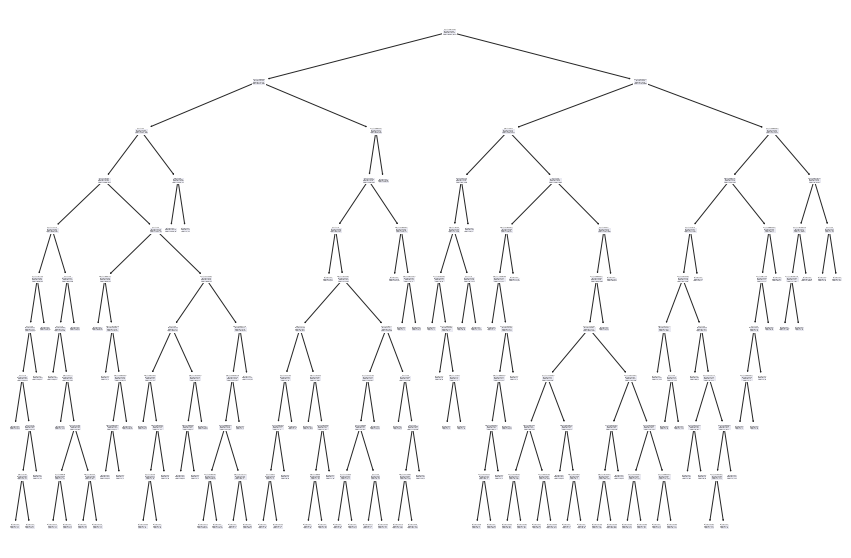

In [67]:
#PLot the Decision Tree
tree.plot_tree(model_dt);
print("No. Of Leaves:",model_dt.get_n_leaves())

In [68]:
preds2= model_dt.predict(x_test)
#Accuracy on test data
print('Test data Accuracy is:',np.mean(preds2==y_test))

Test data Accuracy is: 0.9940566598428316


# Observations:

* We have applied 3 (Random forest , decision tree and logistic regression ) models on our dataset.

* From those of three models we get maximum 99.73 % accuraccy with random forest model.

* So we use random forest model for prediction.

# Final model

In [40]:
import pickle as pkl 

In [69]:
filename= "fraud_model.pk"
pkl.dump(RFC,open(filename,"wb"))


In [70]:
load_model= pkl.load(open(filename,'rb'))